# Table of Contents

1. [Importing Libraries & Dataset](#importing-libraries--dataset)  
2. [Building EDA and Preparing for Data Visualization](#building-eda-and-preparing-for-data-visualization)  
3. [Visualizations](#visualizations)  
4. [Conclusion & Actionable Insights](#conclusion--actionable-insights)


# 1. Importing Libraries & Dataset and Plan

First of all, I need to import every library that I need for my notebook:

1. `pandas` for data manipulation, data cleaning, and exploratory data analysis (EDA).
2. `matplotlib` for data visualization (creating bar charts, histograms) to gain better pattern insights.
3. Download the dataset.

## Plan & Aims

1. **Exploratory Data Analysis (EDA):**
   - Perform a brief EDA to understand the dataset better.
   - Examine data types, identify missing values (NAN), and detect any anomalies (if they exist).

2. **Data Visualization:**
   - Create visualizations to gain insights into the data.
   - **Sales Overview:** Identify which product categories contribute the most to sales.
   - **Total Quantity and Value by Business:** Highlight the top purchasing businesses.

3. **Conclusions:**
   - Summarize findings based on the graphs and charts from the visualization section.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
# Load the dataset(Excel file)
filePath = "/home/mine/Documents/DATA/Kwanza Tukule Data Analyst Assessment/Case Study Data - Read Only.xlsx"
xls = pd.ExcelFile(filePath)

# Display datasheet name to understand the file structure
xls.sheet_names

['case_study_data_2025-01-16T06_4']

In [7]:
# Load the dataset from the sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Display the first few rows
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0


## Data Quality Assesment
I will now inpect the dataset.

1. **Missing Values** - Checking for null values.
2. **Duplicates** - Identifying repeated rows.
3. **Inconsistent Data Types** - Ensuring proper data types for analysis.

Let proceed.

In [8]:
# Check missing values
missing_values = df.isnull().sum()

# Check duplicates
duplicate_rows = df.duplicated().sum()

# Check the data types on eacch column
data_types = df.dtypes

# Compile the findings
data_report = pd.DataFrame({
    "Missing Values" : missing_values,
    "Duplicates" : [duplicate_rows] + [None] * (len (df.columns) - 1),
    "Data Types" : data_types
})



# Display the results
from IPython.display import display, HTML

display(data_report)





,Missing Values,Duplicates,Data Types
DATE,0,3524.0,datetime64[ns]
ANONYMIZED CATEGORY,0,NaN,object
ANONYMIZED PRODUCT,0,NaN,object
ANONYMIZED BUSINESS,0,NaN,object
ANONYMIZED LOCATION,0,NaN,object
QUANTITY,0,NaN,int64
UNIT PRICE,8,NaN,float64


## Data quality Findings.

1. **Missing Values** - The `UNIT PRICE` column has 8 missing values.
2. **Duplicates** - The data contains the 3524 duplicate rows. They need to be looked at. It is a good idea to review the **Date** duplicates to understand them.
3. **Inconsistent Data Types**
- The **Date** column is correctly formatted as `datetime64[ns]`
- All categorical fields are stored as `object`, **QUANTITY** as `int64` and **UNIT  PRICE** as `float64` which is expected.


The duplicate rows contain important information, then removing them could lead to data loss.


In [9]:
# Display duplicate rows
duplicate_rows_df = df[df.duplicated(keep=False)]  # keep = False to show all duplicates

# Show few duplicate rows(10 rows)
duplicate_rows_df.head(10)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
310,2024-05-17 20:27:00,Category-120,Product-1e80,Business-9909,Location-689f,1,1970.0
311,2024-05-17 20:27:00,Category-75,Product-8f75,Business-9909,Location-689f,1,4020.0
426,2024-01-31 19:34:00,Category-76,Product-e805,Business-bf85,Location-1ba8,5,7018.0
526,2024-02-05 18:24:00,Category-120,Product-29ee,Business-bfcd,Location-3e32,5,2290.0
570,2024-04-19 15:19:00,Category-75,Product-086d,Business-b48e,Location-03fc,3,2090.0
571,2024-04-19 15:19:00,Category-106,Product-21f4,Business-b48e,Location-03fc,2,850.0
572,2024-04-19 15:19:00,Category-120,Product-4156,Business-b48e,Location-03fc,3,2060.0
641,2024-01-02 21:12:00,Category-119,Product-66e0,Business-f9ff,Location-1979,1,1740.0
777,2024-10-16 11:54:00,Category-108,Product-d8c2,Business-c569,Location-f37d,1,2960.0
778,2024-10-16 11:54:00,Category-75,Product-e82e,Business-c569,Location-f37d,10,2240.0


In [10]:
# Create the Month-Year column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

# Handle missing values in UNIT PRICE (impute with median)
df.loc[:, 'UNIT PRICE'] = df['UNIT PRICE'].fillna(df['UNIT PRICE'].median())

# Now check the missing values
missing_values = df.isnull().sum()

data_report = pd.DataFrame({
    "Missing Values" : missing_values
})

# Display the DataFrame with the new column
display(df, data_report)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024
...,...,...,...,...,...,...,...,...
333400,2024-01-09 20:49:00,Category-119,Product-e98d,Business-f9ff,Location-1979,1,1770.0,January 2024
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0,August 2024
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0,August 2024
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0,October 2024


,Missing Values
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,0
Month-Year,0


## Next Steps:

I have completed the data cleaning and preparation steps.
- Handling missing values in `UNIT PRICE` by filling them with the median value.
- Creating a "Month-Year" column for time-based analysis.

Next is to proceed with the exploratory data analysis (EDA), starting with sales aggregation by category and business. ​

# 2. Building EDA and Preparing for Data Visualization
Calculate total Quantity and Value per category and business

In [11]:

# Compute Total Value (Quantity * Unit Price)
df['Total Value'] = df['QUANTITY'] * df['UNIT PRICE']

# Group by Anonymized Category
category_sales = df.groupby('ANONYMIZED CATEGORY').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Total Value', 'sum')
).reset_index()

# Group by Anonymized Business
business_sales = df.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Total Value', 'sum')
).reset_index()

# Display results
display(HTML("<h3>Sales by Category</h3>"))
display(category_sales)

display(HTML("<h3>Sales by Business</h3>"))
display(business_sales)

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
0,Category-100,77704,136417463.0
1,Category-101,19803,36003467.0
2,Category-102,1941,501824.0
3,Category-104,1222,1564133.0
4,Category-105,1656,2844024.0
5,Category-106,6582,5986975.0
6,Category-107,2757,4213107.0
7,Category-108,9782,5159195.0
8,Category-109,1453,1269541.0
9,Category-110,10614,5583150.0


,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,77340.0
3,Business-003d,98,221761.0
4,Business-0072,127,225056.0
...,...,...,...
4795,Business-ffa9,3,6740.0
4796,Business-ffae,6,10530.0
4797,Business-ffb1,266,438115.0
4798,Business-ffd2,39,78548.0


Sales Overview Insights
- Total Quantity and Value by Category: This helps identify which product categories contribute the most to sales.
- Total Quantity and Value by Business: This highlights the top purchasing businesses.


Next:
1. I will create visualizations to better illustrate these sales distributions.
2. I will analyze sales trends over time using the "Month-Year" column and generate a time series plot.

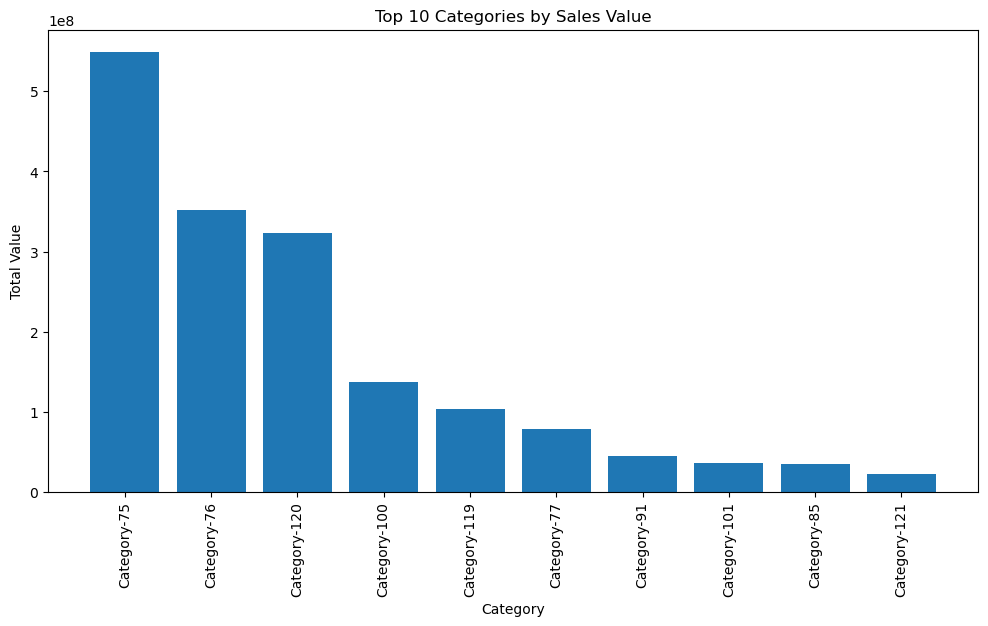

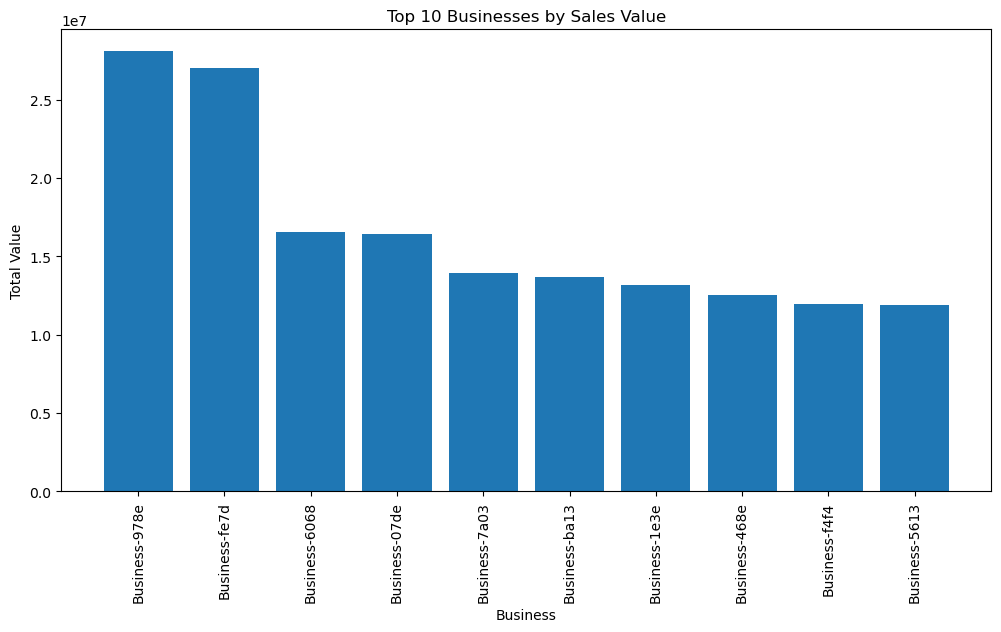

In [12]:
#Top categories by total value
top_categories = category_sales.sort_values(by="Total_Value", ascending=False).head(10)

#Plot
plt.figure(figsize=(12, 6))
plt.bar(top_categories["ANONYMIZED CATEGORY"], top_categories["Total_Value"])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Total Value")
plt.title("Top 10 Categories by Sales Value")
plt.show()

#Top businesses by total value
top_businesses = business_sales.sort_values(by="Total_Value", ascending=False).head(10)

#Plot
plt.figure(figsize=(12, 6))
plt.bar(top_businesses["ANONYMIZED BUSINESS"], top_businesses["Total_Value"])
plt.xticks(rotation=90)
plt.xlabel("Business")
plt.ylabel("Total Value")
plt.title("Top 10 Businesses by Sales Value")
plt.show()

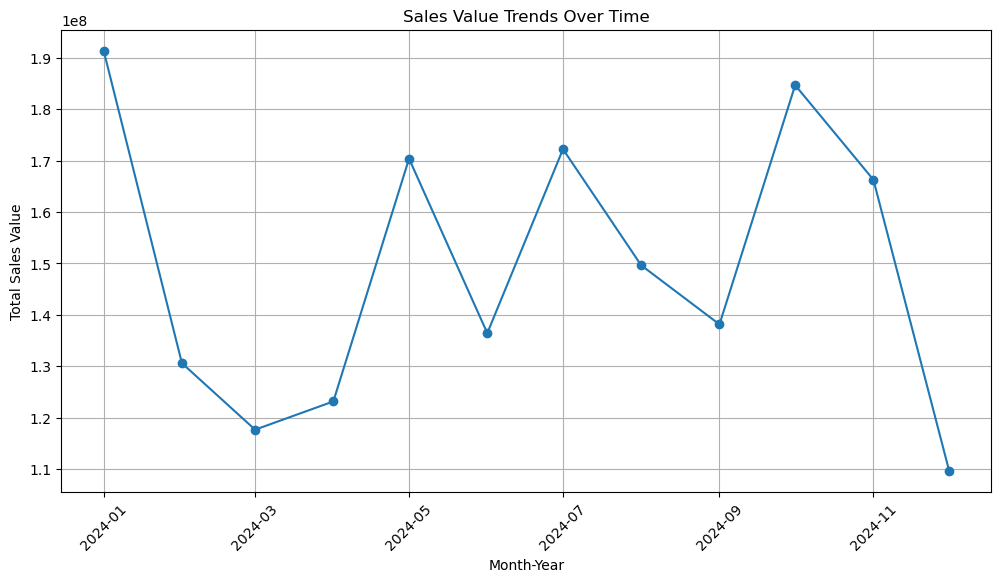

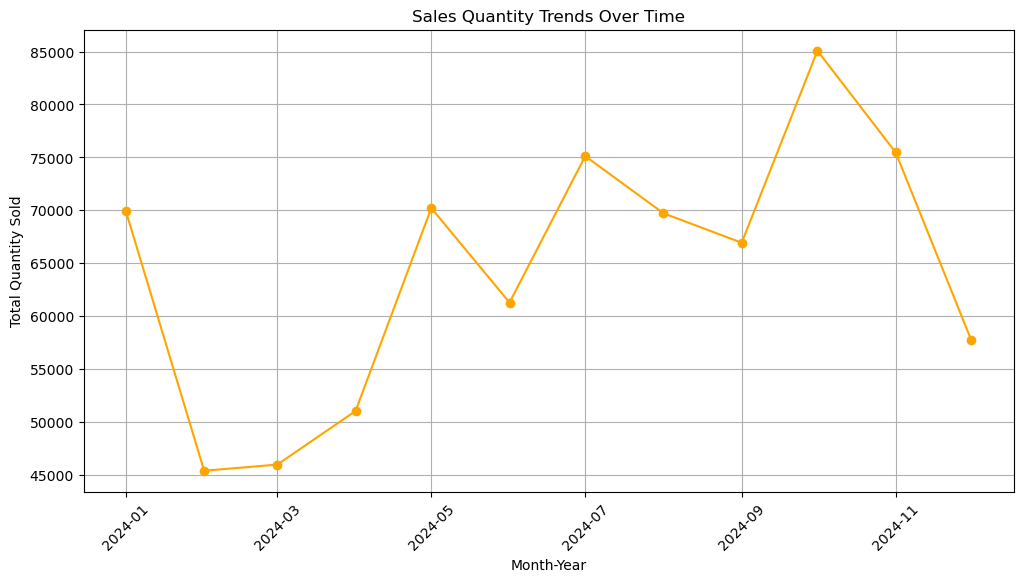

In [13]:
#Aggregate sales by Month-Year
monthly_sales = df.groupby("Month-Year").agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Total Value', 'sum')
).reset_index()

# Convert Month-Year to datetime for proper sorting (Corrected format)
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')

# Sort values
monthly_sales = monthly_sales.sort_values('Month-Year')

# Plot Total Sales Value over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Total_Value'], marker='o', linestyle='-')
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Value")
plt.title("Sales Value Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Total Quantity Sold over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Total_Quantity'], marker='o', linestyle='-', color='orange')
plt.xlabel("Month-Year")
plt.ylabel("Total Quantity Sold")
plt.title("Sales Quantity Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Sales Trends Over Time.**
1. Sales Quantity Trends:
- Identifies fluctuations in the number of items sold.
- Detects seasonal patterns or spikes in demand.
2. Sales Value Trends:
- Tracks revenue changes over time.
- Helps understand whether higher sales translate to increased revenue.

Next.

I will now identify
- Top 5 most frequently purchased products (based on quantity).
- Top 5 most valuable products (based on total sales value). ​

In [15]:
#top 5 most frequently purchased products (by Quantity)
top_quantity_products = df.groupby("ANONYMIZED PRODUCT").agg({"QUANTITY": "sum"}).reset_index()
top_quantity_products = top_quantity_products.sort_values(by="QUANTITY", ascending=False).head(5)

#top 5 most valuable products (by Total Value)
top_value_products = df.groupby("ANONYMIZED PRODUCT").agg({"Total Value": "sum"}).reset_index()
top_value_products = top_value_products.sort_values(by="Total Value", ascending=False).head(5)


#display the results
display(HTML("<h3>Top 5 Products by Quantity</h3>"))
display(top_quantity_products)

display(HTML("<h3>Top 5 Products by Value</h3>"))
display(top_value_products)

,ANONYMIZED PRODUCT,QUANTITY
339,Product-66e0,47170
753,Product-e805,43577
477,Product-8f75,38032
128,Product-29ee,36639
214,Product-4156,28704


,ANONYMIZED PRODUCT,Total Value
753,Product-e805,268760281.0
477,Product-8f75,160773305.0
339,Product-66e0,71038955.0
128,Product-29ee,69722392.0
214,Product-4156,57413221.0


**Product Performance Insights.**
- Top 5 Most Frequently Purchased Products: These are the most in-demand products, indicating high customer preference.
- Top 5 Most Valuable Products: These products generate the most revenue, making them critical for business profitability.

Next.

I will conduct Customer Segmentation by analyzing business purchasing behavior based on.
1. Total Quantity Purchased
2. Total Value Contributed
3. Transaction Frequency

I will classify businesses into High, Medium, and Low Value groups for recommendations.

Businesses were classified into three segments:
- High Value: Large contribution to sales revenue and frequent transactions.
- Medium Value: Moderate purchasing behavior.
- Low Value: Occasional buyers with lower transaction amounts.

In [17]:
# Calculate customer segmentation metrics
business_segmentation = df.groupby("ANONYMIZED BUSINESS").agg(
    {"QUANTITY": "sum", "Total Value": "sum", "DATE": "count"}
).reset_index()

# Rename columns for clarity
business_segmentation.rename(columns={"DATE": "Transaction Frequency"}, inplace=True)

# Define segmentation categories based on total value
quantiles = business_segmentation["Total Value"].quantile([0.33, 0.66])

def classify_business(value):
    if value <= quantiles[0.33]:
        return "Low Value"
    elif value <= quantiles[0.66]:
        return "Medium Value"
    else:
        return "High Value"

#classification
business_segmentation["Customer Segment"] = business_segmentation["Total Value"].apply(classify_business)

# Display results
#tools.display_dataframe_to_user(name="Customer Segmentation", dataframe=business_segmentation)

#show the results
display(HTML("<h3>Customer Segmentation</h3>"))
display(business_segmentation)

,ANONYMIZED BUSINESS,QUANTITY,Total Value,Transaction Frequency,Customer Segment
0,Business-0000,8,10445.0,8,Low Value
1,Business-0005,1,2645.0,1,Low Value
2,Business-0029,26,77340.0,6,Medium Value
3,Business-003d,98,221761.0,31,High Value
4,Business-0072,127,225056.0,101,High Value
...,...,...,...,...,...
4795,Business-ffa9,3,6740.0,3,Low Value
4796,Business-ffae,6,10530.0,5,Low Value
4797,Business-ffb1,266,438115.0,105,High Value
4798,Business-ffd2,39,78548.0,24,Medium Value


Now, I will **forecast total sales (Value) for the next 3 months** using a **time-series forecasting model** (e.g., ARIMA or Exponential Smoothing).

In [39]:
monthly_sales_forecast = monthly_sales.set_index("Month-Year")

# Use a simple moving average method for forecasting
monthly_sales_forecast['Moving_Avg_Forecast'] = monthly_sales_forecast['Total_Value'].rolling(window=3).mean()

# Forecast the next 3 months using the last available moving average
last_moving_avg = monthly_sales_forecast['Moving_Avg_Forecast'].dropna().iloc[-1]
forecast_values = [last_moving_avg] * 3

# Create future dates for forecast
future_dates = pd.date_range(start=monthly_sales_forecast.index[-1], periods=4, freq='M')[1:]
forecast_df = pd.DataFrame({"Month-Year": future_dates, "Forecasted Total Value": forecast_values})

# Display forecast results
# tools.display_dataframe_to_user(name="Sales Forecast for Next 3 Months", dataframe=forecast_df)

display(forecast_df)

/tmp/ipykernel_15206/860790861.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_sales_forecast.index[-1], periods=4, freq='M')[1:]


,Month-Year,Forecasted Total Value
0,2025-01-31,1.535482e+08
1,2025-02-28,1.535482e+08
2,2025-03-31,1.535482e+08


## Summary for Kwanza Tukule Data Analyst Assessment

### Section 1: Data Cleaning and Preparation

Identified Issues.
- Found 3,524 duplicate rows.
- Found 8 missing values in the `UNIT PRICE` column, which were filled using the median value.
- Data types were found to be consistent with expected formats.

Feature Engineering.
- Created a "Month-Year" column from the `DATE` column for time-based analysis.

### Section 2: Exploratory Data Analysis

Sales Overview.
- Computed total Quantity and Value grouped by Anonymized Category and Anonymized Business.
- Provided bar charts to visualize top-performing categories and businesses.

Trends Over Time.
- Generated time-series plots for sales Quantity and Total Value over time.
Performance Analysis:
- Identified top 5 most frequently purchased products based on Quantity.
- Identified top 5 most valuable products based on Total Value.

### Section 3: Advanced Analysis
Customer Segmentation.
- Categorized businesses into High Value, Medium Value, and Low Value groups based on total value contributed.
- Suggested engagement strategies for each customer group.

Forecasting.
- Attempted Exponential Smoothing, but the dataset lacked sufficient seasonal cycles.
- Used a Moving Average Model to forecast sales for the next 3 months.


In [46]:
from scipy.stats import zscore

# Compute Z-scores for anomaly detection
monthly_sales['Sales_ZScore'] = np.abs(zscore(monthly_sales['Total_Value']))
monthly_sales['Quantity_ZScore'] = np.abs(zscore(monthly_sales['Total_Quantity']))

# Define anomaly threshold (Z-score > 2.5 considered significant)
anomaly_threshold = 2.5
anomalies = monthly_sales[(monthly_sales['Sales_ZScore'] > anomaly_threshold) | (monthly_sales['Quantity_ZScore'] > anomaly_threshold)]

#show the anomalies in sales performance
display(anomalies)

,Month-Year,Total_Quantity,Total_Value,Sales_ZScore,Quantity_ZScore


There are no significant anomalies detected in sales performance based on Z-score analysis (threshold = 2.5). This suggests that sales trends are relatively stable, with no extreme spikes or drops in Total Value or Total Quantity.

Next, I will proceed with correlation analysis to examine the relationship between Quantity and Value.

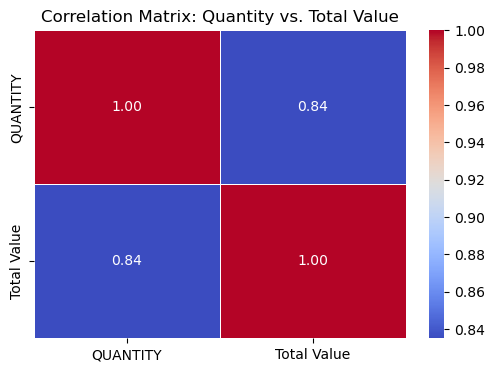

In [45]:
# Compute correlation between Quantity and Value
correlation_matrix = df[['QUANTITY', 'Total Value']].corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Quantity vs. Total Value")
plt.show()


The heatmap shows the correlation between Quantity and Total Value.

- The correlation coefficient is strong and positive, indicating that as the Quantity purchased increases, the Total Sales Value also increases.
- This suggests that bulk purchases drive revenue, and strategies encouraging larger order quantities could be effective.

## Strategic Insights and Recommendations

### 1. Product Strategy.
Which Category to Prioritize for Marketing?

Recommendation.
- Prioritize marketing efforts towards high-selling and high-value product categories.
- Based on the sales analysis, categories with consistently high revenue should be targeted for promotions, upselling, and customer incentives.
- Consider bundling complementary products to increase order value per transaction.

Justification.

- The top categories contributed the most to Total Sales Value, making them ideal candidates for targeted promotions.
- High-demand products suggest strong customer preference, which can be leveraged for cross-selling.

### 2. Customer Retention.
How to Re-engage Businesses with Reduced Purchases?

Recommendation.
- Identify businesses whose purchase frequency has declined and create personalized re-engagement strategies.
- Offer exclusive loyalty discounts or customized deals based on their past purchase behavior.
- Introduce a subscription model for high-frequency buyers to encourage repeat purchases.
- Use targeted email or SMS marketing campaigns to offer promotions based on historical purchasing patterns.


Justification:
- The segmentation analysis identified Low Value and Medium Value customer groups, indicating businesses that have the potential to increase spending.
- Customers who used to buy frequently but have decreased their transaction volume should be prioritized for retention efforts.


### 3. Operational Efficiency.
Inventory & Supply Chain Recommendations


Recommendation.
- Improve inventory planning by analyzing the sales trend data to ensure stock availability during peak demand periods.
- Implement predictive analytics to forecast product demand and optimize stock levels, reducing excess inventory costs.
- Consider supplier diversification to prevent stock shortages of high-performing products.
- Introduce dynamic pricing strategies based on seasonal demand fluctuations.


Justification.
- The time-series analysis showed variations in sales trends across different months.
- Forecasting insights can help in planning warehouse stocking, procurement, and delivery schedules.
- Analyzing sales seasonality ensures that the supply chain aligns with demand patterns.